# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
from sklearn.datasets import load_iris

In [74]:
iris = load_iris()

In [75]:
# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [76]:
iris_df.drop('petal length (cm)', 1, inplace=True)
iris_df.drop('petal width (cm)', 1, inplace=True)

In [78]:
iris_class = iris.target

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [79]:
# 3. Разделите данные на выборку для обучения и тестирования
x_train, x_test, y_train, y_test = train_test_split(iris_df, iris_class, test_size=0.25)

In [80]:
# 4. Постройте модель LDA
lda = LinearDiscriminantAnalysis()

In [81]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [82]:
# Делаем прогноз на тестовой выборке
lda.predict(x_test)

array([1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0,
       2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1])

In [83]:
difference = pd.DataFrame([y_test, lda.predict(x_test)]).T
difference
# 4 ошибки.

,0,1
0,2,1
1,2,2
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [84]:
from matplotlib import colors

<ipython-input-85-359197bba13f>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


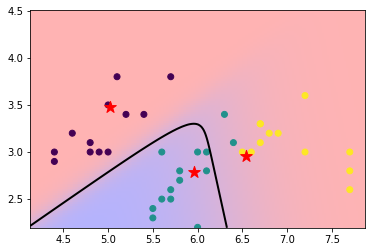

In [85]:
# Визуализация для тестовой выборки
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=lda.predict(x_test))
# Центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')

In [62]:
# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [ ]:
# 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [86]:
from sklearn.cluster import KMeans

In [103]:
k_inertia = []

ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_df)
    k_inertia.append(clf_kmeans.inertia_)

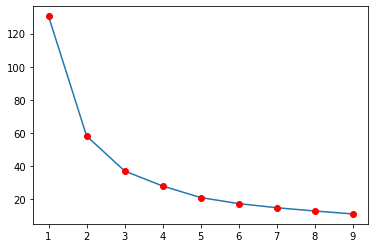

In [104]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [96]:
# Оптимальное число кластеров = 3

In [107]:
kmeans = KMeans(n_clusters=3)

clusters = kmeans.fit_predict(iris_df)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

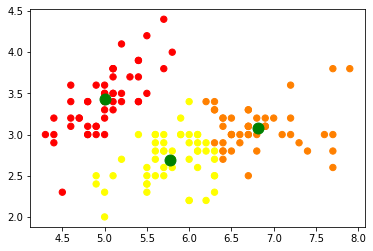

In [126]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=clusters, s=40, cmap = 'autumn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=120)